To Test, which Data is in GDF

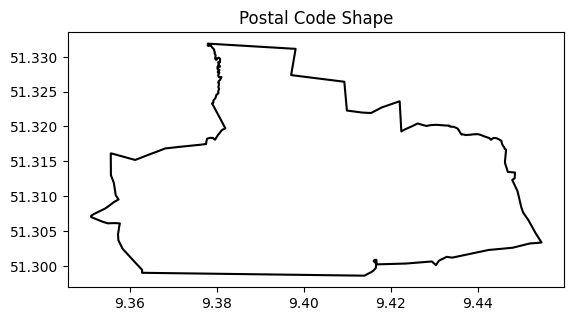

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def extract_zip(city_polygon, tags):
    # Retrieve OSM features within the city boundary using osmnx
    features = ox.features.features_from_polygon(city_polygon, tags)

    return gpd.GeoDataFrame(geometry=features['geometry'], data=None, crs=None) if not features.empty else gpd.GeoDataFrame()

def plot_zip(zip_gdf):
    zip_gdf.boundary.plot(color="black", linewidth=1.5)
    plt.title("Postal Code Shape")
    plt.gca().set_facecolor('white')
    plt.show()

def main():
    postal_code = "34131"
    country = "Germany"
    city = "Kassel"
    
    # Directly retrieve the city boundary for the given postal code using osmnx
    gdf_result = ox.geocode_to_gdf({"city": city, "country": country, "boundary": "postal_code", "postal_code": postal_code}, which_result=None)
    
    if not gdf_result.empty:
        city_boundary = gdf_result.geometry.unary_union
        
        # Define the tags for the Overpass API
        tags = {"postal_code": postal_code}
        
        # Extract OSM features within the city boundary based on the defined tags
        postal_code_geometry = extract_zip(city_boundary, tags)

        if not postal_code_geometry.empty:
            plot_zip(postal_code_geometry)
        else:
            print(f"No features found for postal code {postal_code} in {country}. Please check and try again.")
    else:
        print(f"No information found for {city}, {country} with the provided parameters.")

if __name__ == "__main__":
    main()


Commented Version, Refactor


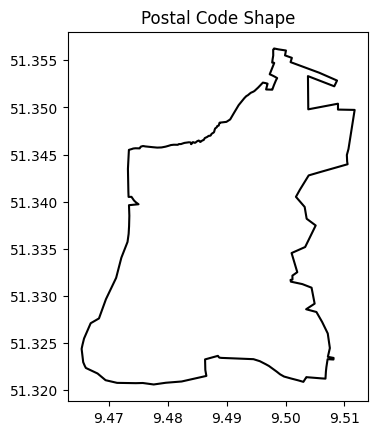

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [32]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def extract_zip(city_polygon, tags):
    """
    Extrahiert OSM-Features innerhalb der Stadtgrenze basierend auf den Tags.
    """
    features = ox.features.features_from_polygon(city_polygon, tags)
    return gpd.GeoDataFrame(geometry=features['geometry'], data=None, crs=None) if not features.empty else gpd.GeoDataFrame()

def plot_zip(zip_gdf):
    """
    Plottet die Grenze des Postleitzahlgebiets.
    """
    zip_gdf.boundary.plot(color="black", linewidth=1.5)
    plt.title("Postal Code Shape")
    plt.gca().set_facecolor('white')
    plt.show()

def main(postal_code, country, city):
    """
    Hauptfunktion zum Abrufen und Darstellen von Postleitzahlgeometrie.
    """
    gdf_result = ox.geocode_to_gdf({"city": city, "country": country, "boundary": "postal_code", "postal_code": postal_code}, which_result=None)

    if not gdf_result.empty:
        city_boundary = gdf_result.geometry.unary_union
        tags = {"postal_code": postal_code}
        
        postal_code_geometry = extract_zip(city_boundary, tags)

        if not postal_code_geometry.empty:
            plot_zip(postal_code_geometry)
        else:
            print(f"Keine Features gefunden für die Postleitzahl {postal_code} in {country}. Bitte überprüfen und erneut versuchen.")
    else:
        print(f"Keine Informationen gefunden für {city}, {country} mit den angegebenen Parametern.")

if __name__ == "__main__":
    postal_code = "34127"
    country = "Germany"
    city = "Kassel"
    main(postal_code, country, city)

Checking Data extracted

                                            geometry  bbox_north  bbox_south  \
0  MULTIPOLYGON (((9.35102 51.30713, 9.35118 51.3...   51.369403   51.260381   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat      lon  \
0   9.570084   9.351023  153810105  relation   62598  51.315455  9.49241   

      class            type  place_rank  importance addresstype    name  \
0  boundary  administrative          12    0.623671        city  Kassel   

             display_name  
0  Kassel, Hesse, Germany  


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  

Verfügbare Spalten in features:
Index(['nodes', 'boundary', 'geometry', 'note', 'ways', 'postal_code',
       'postal_code_level', 'type'],
      dtype='object')
                                                               geometry
element_type osmid                                                     
relation     1189966  POLYGON ((9.35102 51.30713, 9.35181 51.30745, ...


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


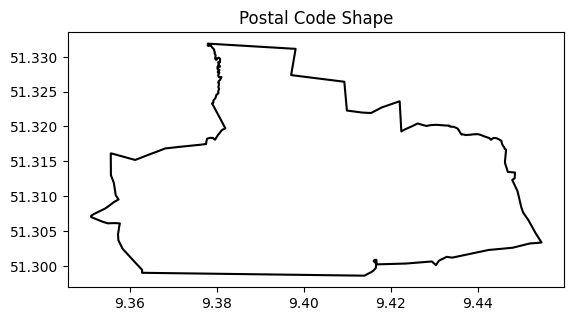

In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def extract_zip(city_polygon, tags):
    """
    Extrahiert OSM-Features innerhalb der Stadtgrenze basierend auf den Tags.
    """
    features = ox.features.features_from_polygon(city_polygon, tags)
    
    # Ausgabe der verfügbaren Spalten im features-Geodatenframe
    print("Verfügbare Spalten in features:")
    print(features.columns)
    
    return gpd.GeoDataFrame(geometry=features['geometry'], data=None, crs=None) if not features.empty else gpd.GeoDataFrame()

def plot_zip(zip_gdf):
    """
    Plottet die Grenze des Postleitzahlgebiets.
    """
    zip_gdf.boundary.plot(color="black", linewidth=1.5)
    plt.title("Postal Code Shape")
    plt.gca().set_facecolor('white')
    plt.show()

def main(postal_code, country, city):
    """
    Hauptfunktion zum Abrufen und Darstellen von Postleitzahlgeometrie.
    """
    gdf_result = ox.geocode_to_gdf({"city": city, "country": country, "boundary": "postal_code", "postal_code": postal_code}, which_result=None)
    print(gdf_result)
    if not gdf_result.empty:
        city_boundary = gdf_result.geometry.unary_union
        tags = {"postal_code": postal_code}
        
        postal_code_geometry = extract_zip(city_boundary, tags)

        print(postal_code_geometry)

        if not postal_code_geometry.empty:
            plot_zip(postal_code_geometry)
        else:
            print(f"Keine Features gefunden für die Postleitzahl {postal_code} in {country}. Bitte überprüfen und erneut versuchen.")
    else:
        print(f"Keine Informationen gefunden für {city}, {country} mit den angegebenen Parametern.")

if __name__ == "__main__":
    postal_code = "34131"
    country = "Germany"
    city = "Kassel"
    main(postal_code, country, city)



Freestyle Testing

In [27]:
shape = ox.geocode_to_gdf({"city": city, "country": country, "boundary": "postal_code", "postal_code": "34131"}, which_result=None)
print(shape["geometry"])

0    MULTIPOLYGON (((9.35102 51.30713, 9.35118 51.3...
Name: geometry, dtype: geometry


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [28]:
place = "Kassel, Germany"

tags = {"postal_code": "34131"}

In [29]:
osm_features = ox.features.features_from_polygon(shape, tags)
osm_features

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


<Axes: >

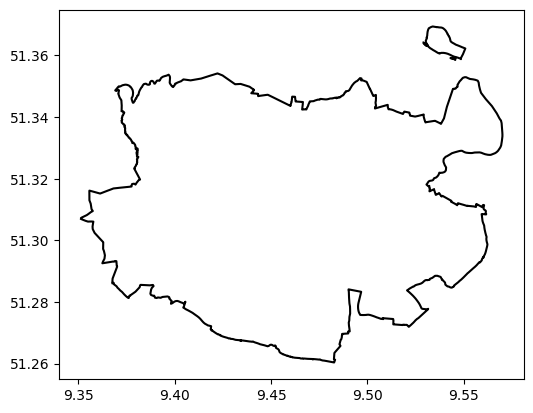

In [13]:
shape.boundary.plot(color="black", linewidth=1.5)